# Admission Prediction
Training a model that predicts chance of admission of new students. 

1. We will conduct Exploratory Data Analysis on the given data to best describe and understand te problem. 
2. We will find the top 4 criteria that affect a student's chances of admission. 
3. We then compare the performance of Linear Regression Model against the performance of a Random Forest Regressor to find the model that gives the best fit.

We will use RMSE and R-Squared Score to compare the 2 models.

##Loading the dataset
We load the dataset and drop Serial No. column as it is not required. We then check for any missing data in the dataset.

We then separate the data into input and target variables for fitting into the models.

In [ ]:
import pandas as pd

admissions = pd.read_csv("Admission_Predict.csv")
admissions = admissions.drop('Serial No.',axis = 1)
admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# checking for missing data
admissions.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
admissions.info()
X = admissions.drop('Chance of Admit ',axis = 1)
y = admissions['Chance of Admit ']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


## Visualise the data

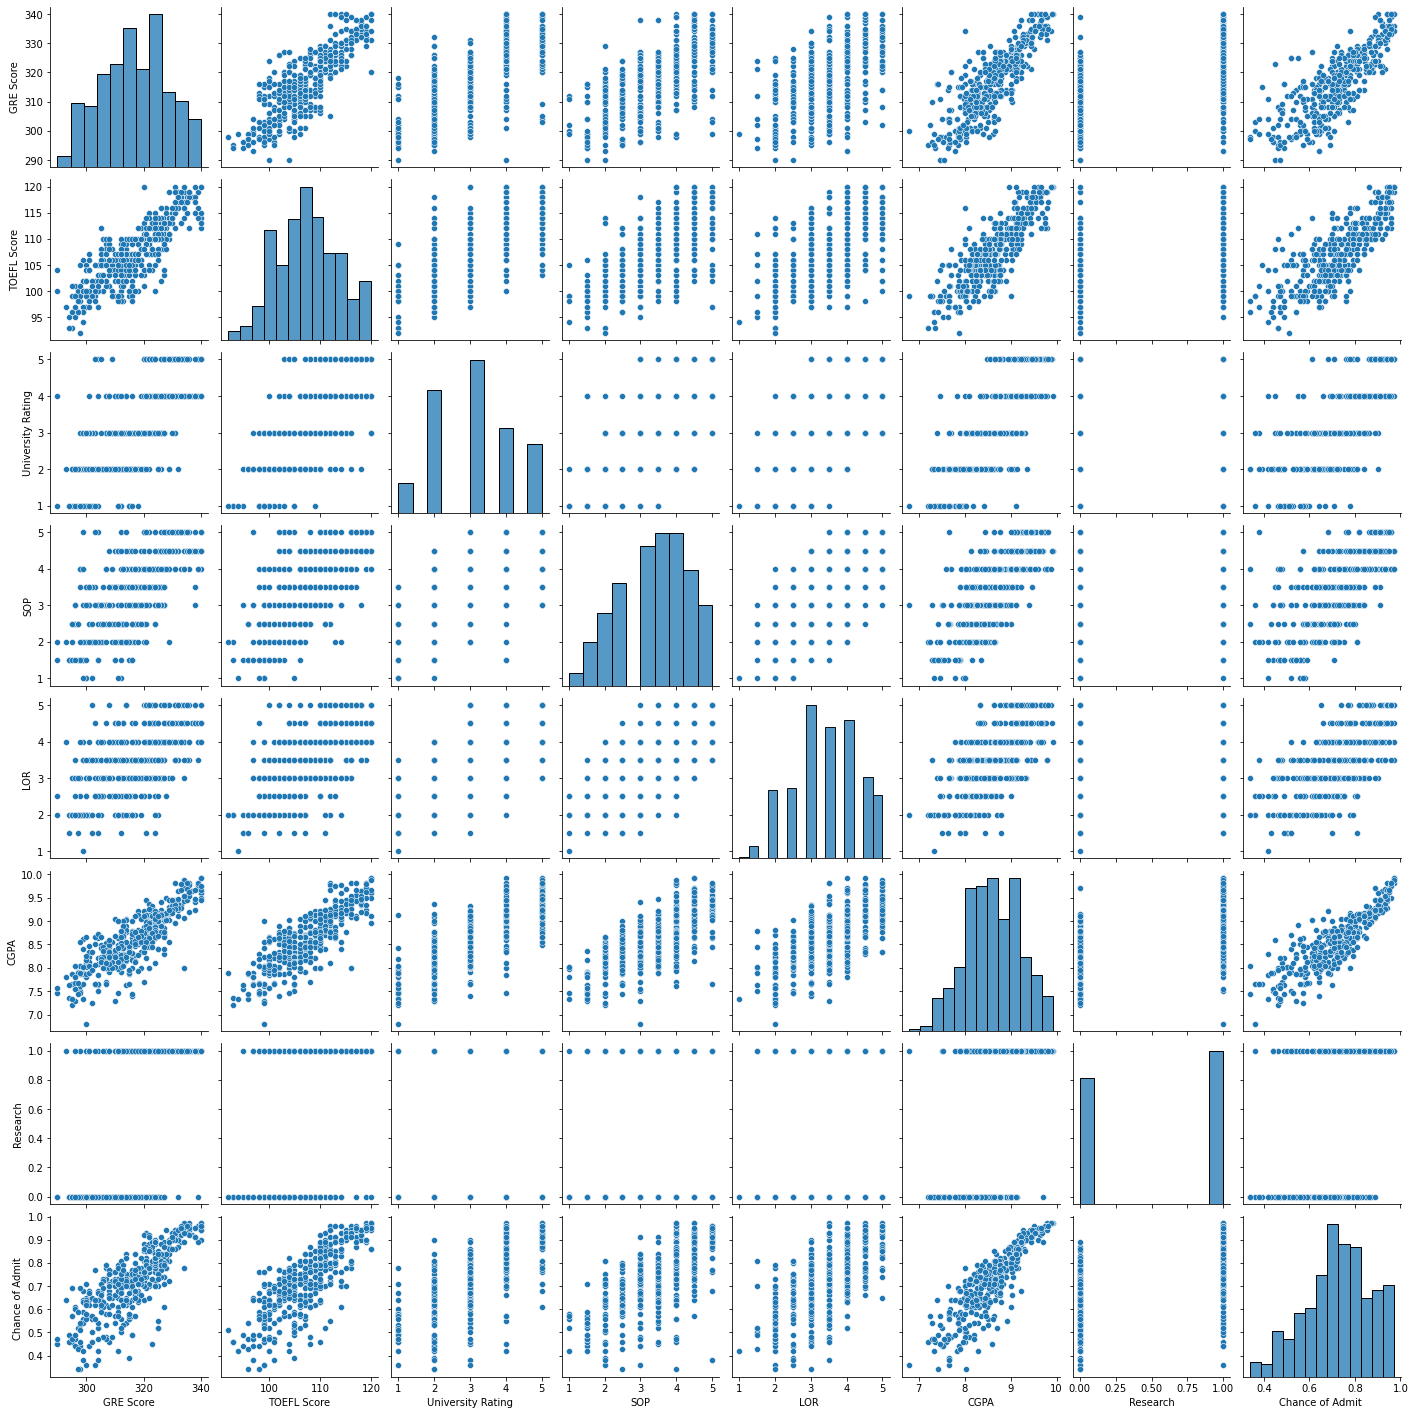

In [ ]:
import seaborn as sns
sns.pairplot(admissions)

From the above scatter plots, you notice that as the GRE Score,CGPA and TOEFL Score increase the change of getting the admission increase too, there is a linear relationship between them.

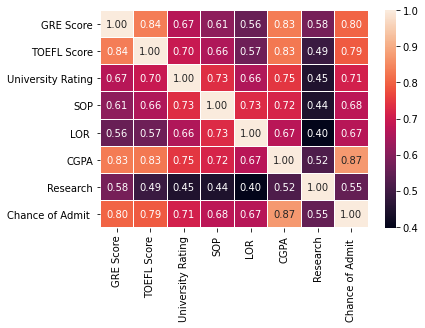

In [ ]:
# looking for relevant independent variable
cr = admissions.corr()
sns.heatmap(cr, annot=True, linewidths=0.05, fmt= '.2f')

## Finding top 4 variables affecting chances of admission

In [ ]:
wts=(admissions.corr()**2)["Chance of Admit "]
vars_affecting_adm=wts.sort_values(ascending = False)[1:] 
vars_affecting_adm

CGPA                 0.762634
GRE Score            0.644184
TOEFL Score          0.626621
University Rating    0.505877
SOP                  0.456614
LOR                  0.448751
Research             0.306033
Name: Chance of Admit , dtype: float64

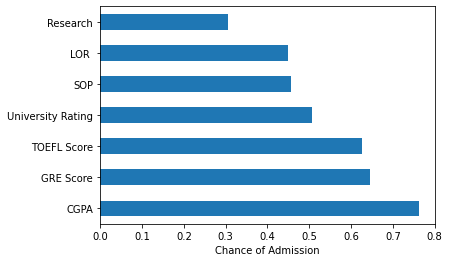

In [ ]:
import matplotlib.pyplot as plt

vars_affecting_adm.plot.barh()
plt.xlabel('Chance of Admission')
plt.show()

The top 4 independent variable correlated to the target variable are CGPA,GRE Score,TOEFL Score and University Rating.

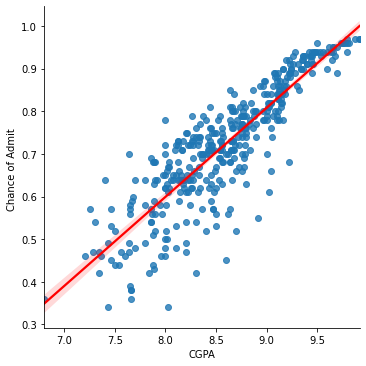

In [ ]:
sns.lmplot(x="CGPA", y="Chance of Admit ", data=admissions, line_kws={'color': 'red'})

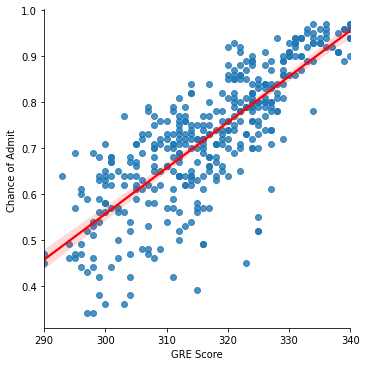

In [ ]:
sns.lmplot(x="GRE Score", y="Chance of Admit ", data=admissions, line_kws={'color': 'red'})

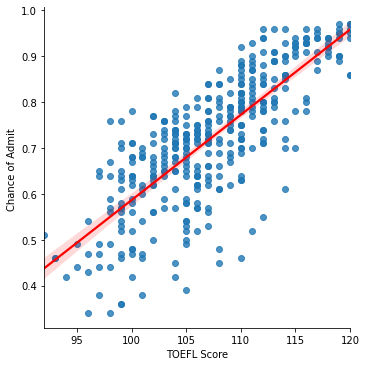

In [ ]:
sns.lmplot(x="TOEFL Score", y="Chance of Admit ", data=admissions, line_kws={'color': 'red'})

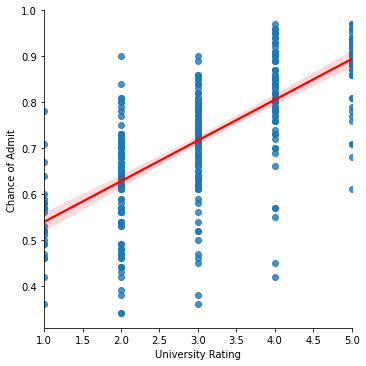

In [ ]:
sns.lmplot(x="University Rating", y="Chance of Admit ", data=admissions, line_kws={'color': 'red'})

## Splitting the dataset
We now split the dataset into train and test sets and scale the features. **Feature Scaling** is a technique to standardize the independent features present in the data in a fixed range. 

*If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.*

The `StandardScaler()` standardizes features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:
`z = (x - u) / s`

where `u` is the mean of the training samples and `s` is the standard deviation of the training samples 

In [ ]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression Model

In [ ]:
# Fitting linear regression Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train, y_train)
y_pred=lin_reg.predict(X_test)
y_train_pred=lin_reg.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
scores={
    'Metric':['RMSE','R2 Score'],
    'Test Set':[sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)*100],
    'Training Set':[sqrt(mean_squared_error(y_train, y_train_pred)), r2_score(y_train, y_train_pred)*100]
}
df_linreg=pd.DataFrame(scores, columns=['Metric','Training Set','Test Set'])
df_linreg

,Metric,Training Set,Test Set
0,RMSE,0.061131,0.069293
1,R2 Score,82.387097,72.486312


## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 30, random_state = 0)
rf.fit(X_train, y_train)
y_pred2=rf.predict(X_test)
y_train_pred2=rf.predict(X_train)

In [ ]:
scores={
    'Metric':['RMSE','R2 Score'],
    'Test Set':[sqrt(mean_squared_error(y_test, y_pred2)), r2_score(y_test, y_pred2)*100],
    'Training Set':[sqrt(mean_squared_error(y_train, y_train_pred2)), r2_score(y_train, y_train_pred2)*100]
}
df_rf=pd.DataFrame(scores, columns=['Metric','Training Set','Test Set'])
df_rf

,Metric,Training Set,Test Set
0,RMSE,0.027350,0.078062
1,R2 Score,96.474376,65.082118


## Linear Regression vs. Random Forest 
**The linear regression performs better!** The RMSE difference between the test set and the training set of the linear regression is very small compared to the one of random forest regression

## Computing Accuracy of Linear Regression Model
We use cross validation score to compute accuracy

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = lin_reg, X = X_train, y = y_train, cv = 5)
print("Mean Accuracy of Linear Regression Model:",(accuracies.mean()).round(3))

accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 5)
print("Mean Accuracy of Random Forest Regressor Model:",(accuracies.mean()).round(3))

Mean Accuracy of Linear Regression Model: 0.812
Mean Accuracy of Random Forest Regressor Model: 0.77
